In [0]:
import numpy as np
np.random.seed(123)
from tensorflow.keras.models import Sequential
import tensorflow as tf
tf.random.set_seed(123)

from tensorflow.keras.layers import Dense, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt

from keras.datasets import mnist
(X_train1, y_train1), (X_test1, y_test1) = mnist.load_data()

In [0]:
def compute_mag_phase(toBeTransfromed):
    dft = np.fft.fft2(toBeTransfromed)
    dft_shift = np.fft.fftshift(dft)
    mag = np.abs(dft_shift)
    ang = np.angle(dft_shift)
    return mag, ang

def reconstruct(mag,ang):
    combined = np.multiply(mag, np.exp(1j*ang))
    fftx = np.fft.ifftshift(combined)
    ffty = np.fft.ifft2(fftx)
    imgCombined = np.abs(ffty)
    return imgCombined

def pre_process_mag(dataset):
    mag = np.zeros(dataset.shape)
    phase = np.zeros(dataset.shape)
    x= 0
    for i in range(0,dataset.shape[0]):
      mag[i,:,:],phase[i,:,:] = compute_mag_phase(dataset[i])
    return mag,phase


def reconstructAll(mag, ang):
    recon = np.zeros(mag.shape)
    for i in range(0,recon.shape[0]):
      recon[i,:,:] = reconstruct(mag[i,:,:],ang[i,:,:])
    return recon

In [0]:
mag, ang = compute_mag_phase(X_train1[0])
new = reconstruct(mag, ang)

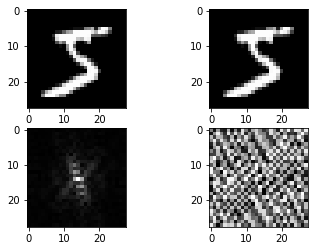

In [0]:
plt.subplot(221)
plt.imshow(X_train1[0], cmap='gray')
plt.subplot(222)
plt.imshow(new, cmap='gray')
plt.subplot(223)
plt.imshow(mag, cmap='gray')
plt.subplot(224)
plt.imshow(ang, cmap='gray')

In [0]:
X_train1_mag, X_train1_phase  = pre_process_mag(X_train1)
X_test1_mag, X_test1_phase  = pre_process_mag(X_test1)

In [0]:
X_train_flatten = X_train1.reshape(X_train1.shape[0], X_train1.shape[1] * X_train1.shape[2])
X_test_flatten = X_test1.reshape(X_test1.shape[0], X_test1.shape[1] * X_test1.shape[2])

X_train_flatten = X_train_flatten.astype('float32')
X_test_flatten = X_test_flatten.astype('float32')
X_train_flatten /= 255
X_test_flatten /= 255
Y_train_class = np_utils.to_categorical(y_train1, 10)
Y_test_class = np_utils.to_categorical(y_test1, 10)

In [0]:
model = Sequential([
    Dense(10, input_shape=(784,)),
    Activation('softmax'),
])

In [0]:
model.summary()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=100, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5149 - accuracy: 0.8654 - val_loss: 0.3191 - val_accuracy: 0.9135
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3183 - accuracy: 0.9117 - val_loss: 0.2875 - val_accuracy: 0.9199
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2935 - accuracy: 0.9172 - val_loss: 0.2782 - val_accuracy: 0.9227
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2814 - accuracy: 0.9213 - val_loss: 0.2686 - val_accuracy: 0.9246
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2739 - accuracy: 0.9229 - val_loss: 0.2689 - val_accuracy: 0.9247
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2682 - accuracy: 0.9242 - val_loss: 0.2654 - val_accuracy: 0.9281
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2635 - accuracy: 0.9257 - val_loss: 0.2653 - val_ac

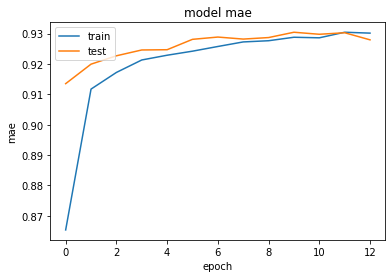

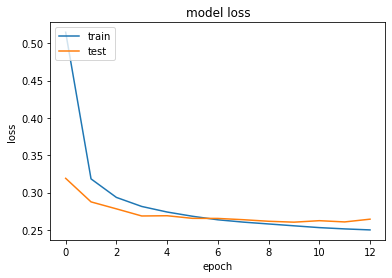

In [0]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
results = model.evaluate(X_test_flatten, Y_test_class, batch_size=32)
print('test loss, test acc:', results)


313/313 [==============================] - 1s 3ms/step - loss: 0.2703 - accuracy: 0.9252
test loss, test acc: [0.2703413963317871, 0.9251999855041504]
